Generating EEG data...
EEG CSV file generated at eeg_simulation_data.csv
Visualizing EEG data...


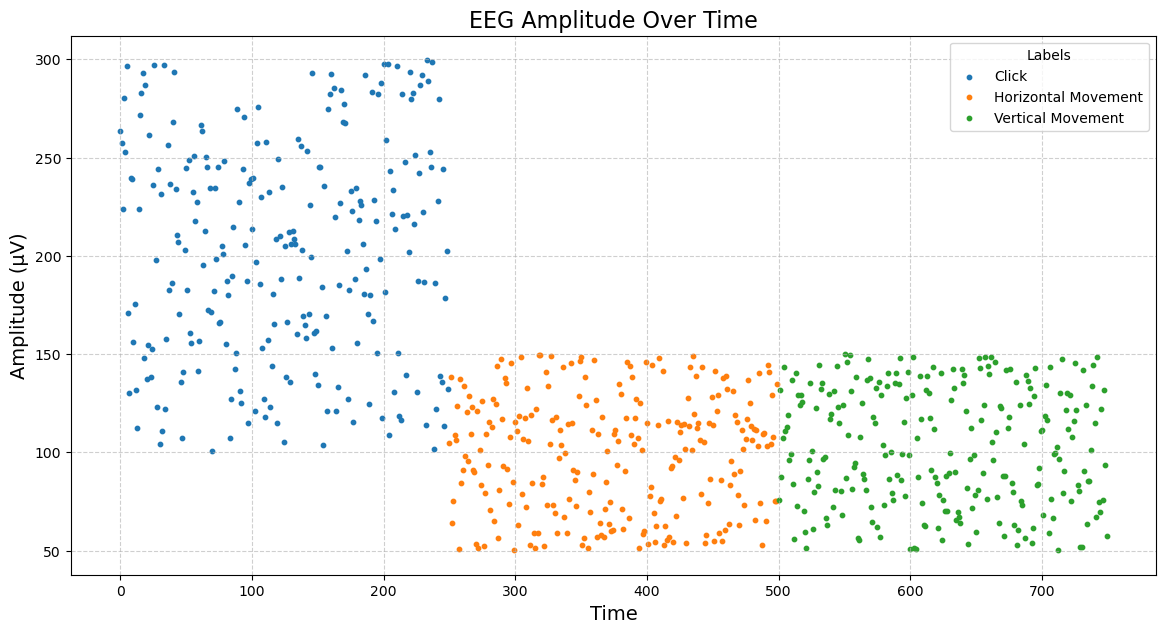

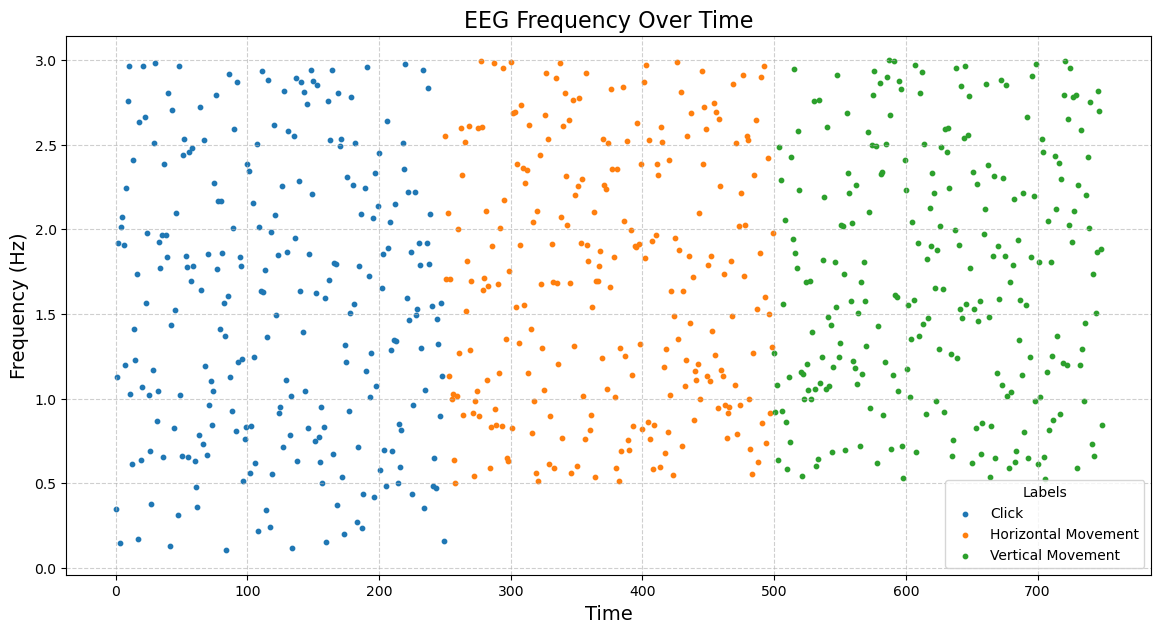

Applying LDA...


NameError: name 'output_lda_path' is not defined

In [1]:
import csv
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import plotly.express as px

# Function to generate EEG CSV data
def generate_eeg_csv(file_path, total_records=750):
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Time', 'Amplitude', 'Frequency', 'Label'])
        for i in range(total_records):
            time = i
            if i < 250:  # Simulate Eye Blink Data
                label = 'Click'
                amplitude = random.uniform(100, 300)
                frequency = random.uniform(0.1, 3)
            elif 250 <= i < 500:  # Simulate Horizontal Eye Movement
                label = 'Horizontal Movement'
                amplitude = random.uniform(50, 150)
                frequency = random.uniform(0.5, 3)
            else:  # Simulate Vertical Eye Movement
                label = 'Vertical Movement'
                amplitude = random.uniform(50, 150)
                frequency = random.uniform(0.5, 3)
            writer.writerow([time, amplitude, frequency, label])
    print(f'EEG CSV file generated at {file_path}')

# Function to plot the data
def plot_eeg_data(file_path):
    data = pd.read_csv(file_path)
    plt.figure(figsize=(14, 7))
    for label, group in data.groupby('Label'):
        plt.scatter(group['Time'], group['Amplitude'], label=label, s=10)

    plt.title('EEG Amplitude Over Time', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Amplitude (µV)', fontsize=14)
    plt.legend(title="Labels")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    plt.figure(figsize=(14, 7))
    for label, group in data.groupby('Label'):
        plt.scatter(group['Time'], group['Frequency'], label=label, s=10)

    plt.title('EEG Frequency Over Time', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Frequency (Hz)', fontsize=14)
    plt.legend(title="Labels")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Function to apply LDA
def apply_lda_to_2d(file_path):
    data = pd.read_csv(file_path)

    # Encode labels into numeric values
    label_mapping = {'Click': 0, 'Horizontal Movement': 1, 'Vertical Movement': 2}
    data['LabelEncoded'] = data['Label'].map(label_mapping)

    # Select features (Frequency, Amplitude, Time) and target (LabelEncoded)
    X = data[['Frequency', 'Amplitude', 'Time']].values
    y = data['LabelEncoded'].values

    # Apply LDA for dimensionality reduction to 2D
    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(X, y)

    # Add the LDA-transformed components to the DataFrame for visualization
    data['LDA1'] = X_lda[:, 0]
    data['LDA2'] = X_lda[:, 1]
    lda_data = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
    lda_data['Label'] = y  # Add the target column back

    # Save to a CSV file
    lda_data.to_csv(output_lda_path, index=False)
    # Plot the 2D LDA projection
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='LDA1', y='LDA2', hue='Label', data=data, palette='Set1')
    plt.title('2D LDA Projection of EEG Data', fontsize=16)
    plt.xlabel('LDA Component 1', fontsize=14)
    plt.ylabel('LDA Component 2', fontsize=14)
    plt.legend(title="Labels")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Main function to execute the simulation and plotting
def main():
    output_file = 'eeg_simulation_data.csv'
    output_lda_path='lda_trasformed.csv'
    print("Generating EEG data...")
    generate_eeg_csv(output_file)

    print("Visualizing EEG data...")
    plot_eeg_data(output_file)

    print("Applying LDA...")
    apply_lda_to_2d(output_file)

# Run the script
if __name__ == "__main__":
    main()